<a href="https://colab.research.google.com/github/ivanpoptsov/learning_with_a_teacher/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_git_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [4]:
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Заполним пропуски в столбце Tenure (сколько лет человек является клиентом банка) - если нет значения, то скорее всего человек является клиентом банка менее года - значит, значение может быть равно "0"**

In [5]:
data['Tenure'] = data['Tenure'].fillna(0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Определим категорийные столбцы методом nunique**

In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Проверим данные на мультиколлинерность построением графика scatter_matrix**

<function matplotlib.pyplot.show>

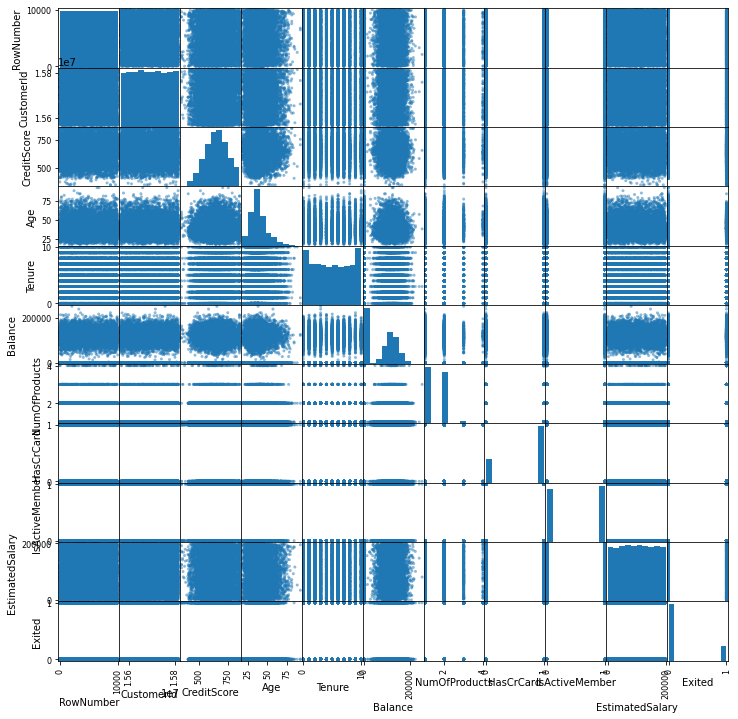

In [8]:
pd.plotting.scatter_matrix(data,figsize=(12,12))
plt.show

**На диаграммах не зафиксированна мультиколлинерность данных, поэтому используем все интересующие нас столбцы**

In [9]:
target = data['Exited']
features = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Gender', 'Surname', 'Geography'], axis=1)
display(target.head())
display(features.head())

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2.0,0.00,1,1,1,101348.88
1,608,41,1.0,83807.86,1,0,1,112542.58
2,502,42,8.0,159660.80,3,1,0,113931.57
3,699,39,1.0,0.00,2,0,0,93826.63
4,850,43,2.0,125510.82,1,1,1,79084.10


In [10]:
features_train, features_test, target_train, target_test = (
    train_test_split(
        features, target, test_size=0.2, random_state=12345, stratify=target
    )
)

In [11]:
features_train, features_valid, target_train, target_valid = (
    train_test_split(
        features_train, target_train, test_size=0.2, random_state=12345, stratify=target_train
    )
)

**Проверим разбивку по их длине**

In [12]:
len(features_train)

6400

In [13]:
len(features_test)

2000

In [14]:
len(features_valid)

1600

## Исследование задачи

**Проверим полученную выборку на дисбаланс классов, для этого выведем на экран крайние значения столбцов методом describe**

In [15]:
features.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,4.543400,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,3.111573,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,4.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


**Как видно из полученной таблицы - у нас наблюдается дисбаланс классов.**

**Для начала посчитаем метрики на несбалансированных классах.**

In [16]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("F1:", f1_score(target_valid, predicted_valid),'\n',
      "AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None))

F1: 0.44975124378109455 
 AUC-ROC: 0.7291295470524217


In [17]:
best_model_f1 = None
best_model_roc_auc = None
best_result_f1 = 0
best_result_roc_auc = 0
for depth in range(1, 21):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train) 
    predictions_valid = model_tree.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    if result_f1 > best_result_f1:
        best_model_f1 = model_tree
        best_result_f1 = result_f1
        best_depth_f1 = depth
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None)
    if result_roc_auc > best_result_roc_auc:
        best_model_roc_auc = model_tree
        best_result_roc_auc = result_roc_auc
        best_depth_roc_auc = depth
print(
    "F1 лучшей модели:", best_result_f1, '\n',
    "Глубина дерева:", best_depth_f1, '\n',
    "AUC-ROC лучшей модели:", best_result_roc_auc, '\n',
    "Глубина дерева:", best_depth_roc_auc,
    )

F1 лучшей модели: 0.530214424951267 
 Глубина дерева: 5 
 AUC-ROC лучшей модели: 0.8289287399716848 
 Глубина дерева: 6


In [18]:
best_model_f1 = None
best_model_roc_auc = None
best_result_f1 = 0
best_result_roc_auc = 0
for est in range(1, 71, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predictions_valid = model_forest.predict(features_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_f1 = model_forest
            best_result_f1 = result_f1
            best_depth_f1 = depth
            best_est_f1 = est
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None)
        if result_roc_auc > best_result_roc_auc:
            best_model_roc_auc = model_forest
            best_result_roc_auc = result_roc_auc 
            best_depth_roc_auc = depth
            best_est_roc_auc = est
print(
    "F1 лучшей модели:", best_result_f1, '\n',
    "Количество деревьев:", best_est_f1, '\n',
    "Глубина дерева:", best_depth_f1, '\n',
    "AUC-ROC лучшей модели:", best_result_roc_auc, '\n',
    "Количество деревьев:", best_est_roc_auc, '\n',
    "Глубина дерева:", best_depth_roc_auc)

F1 лучшей модели: 0.5238095238095238 
 Количество деревьев: 1 
 Глубина дерева: 3 
 AUC-ROC лучшей модели: 0.8535865974516282 
 Количество деревьев: 61 
 Глубина дерева: 8


**Наилучшие результаты у модели "Случайный лес" -**

**F1: 0.533,**

**AUC-ROC: 0.831**

## Борьба с дисбалансом

**Избавимся от дисбаланса класса методом увеличения и уменьшения выборки**

**Увеличим выборку методом upsample**

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

**Увеличим обучающую выборку:**

In [20]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

**Проверим размер выборке после увеличения:**

In [21]:
features_zeros = features_upsampled[target_upsampled == 0]
features_ones = features_upsampled[target_upsampled == 1]
target_zeros = target_upsampled[target_upsampled == 0]
target_ones = target_upsampled[target_upsampled == 1]

In [22]:
features_zeros.shape[0]

5096

In [23]:
features_ones.shape[0]

5216

**Уменьшим выборку методом downsample**

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

**Уменьшим обучающую выборку:**

In [25]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

**Проверим размер выборке после уменьшения:**

In [26]:
features_zeros = features_downsampled[target_downsampled == 0]
features_ones = features_downsampled[target_downsampled == 1]
target_zeros = target_downsampled[target_downsampled == 0]
target_ones = target_downsampled[target_downsampled == 1]

In [27]:
features_zeros.shape[0]

1274

In [28]:
features_ones.shape[0]

1304

**Обучим и проверим модели на сбалансированных данных**

In [29]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("F1:", f1_score(target_valid, predicted_valid),'\n',
      "AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None))

F1: 0.4530168150346192 
 AUC-ROC: 0.7255949571900492


In [30]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print("F1:", f1_score(target_valid, predicted_valid),'\n',
      "AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None))

F1: 0.44975124378109455 
 AUC-ROC: 0.7291295470524217


In [31]:
best_model_f1 = None
best_model_roc_auc = None
best_result_f1 = 0
best_result_roc_auc = 0
for depth in range(1, 21):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_downsampled, target_downsampled)
    predictions_valid = model_tree.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    if result_f1 > best_result_f1:
        best_model_f1 = model_tree
        best_result_f1 = result_f1
        best_depth_f1 = depth
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None)
    if result_roc_auc > best_result_roc_auc:
        best_model_roc_auc = model_tree
        best_result_roc_auc = result_roc_auc
        best_depth_roc_auc = depth
print(
    "F1 лучшей модели:", best_result_f1, '\n',
    "Глубина дерева:", best_depth_f1, '\n',
    "AUC-ROC лучшей модели:", best_result_roc_auc, '\n',
    "Глубина дерева:", best_depth_roc_auc,
    )

F1 лучшей модели: 0.5461441213653603 
 Глубина дерева: 6 
 AUC-ROC лучшей модели: 0.8311270237212394 
 Глубина дерева: 5


In [32]:
best_model_f1 = None
best_model_roc_auc = None
best_result_f1 = 0
best_result_roc_auc = 0
for depth in range(1, 21):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predictions_valid = model_tree.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    if result_f1 > best_result_f1:
        best_model_f1 = model_tree
        best_result_f1 = result_f1
        best_depth_f1 = depth
    probabilities_valid = model_tree.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None)
    if result_roc_auc > best_result_roc_auc:
        best_model_roc_auc = model_tree
        best_result_roc_auc = result_roc_auc
        best_depth_roc_auc = depth
print(
    "F1 лучшей модели:", best_result_f1, '\n',
    "Глубина дерева:", best_depth_f1, '\n',
    "AUC-ROC лучшей модели:", best_result_roc_auc, '\n',
    "Глубина дерева:", best_depth_roc_auc,
    )

F1 лучшей модели: 0.577373211963589 
 Глубина дерева: 5 
 AUC-ROC лучшей модели: 0.831741002205507 
 Глубина дерева: 5


In [33]:
best_model_f1 = None
best_model_roc_auc = None
best_result_f1 = 0
best_result_roc_auc = 0
for est in range(1, 71, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_downsampled, target_downsampled)
        predictions_valid = model_forest.predict(features_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_f1 = model_forest
            best_result_f1 = result_f1
            best_depth_f1 = depth
            best_est_f1 = est
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None)
        if result_roc_auc > best_result_roc_auc:
            best_model_roc_auc = model_forest
            best_result_roc_auc = result_roc_auc 
            best_depth_roc_auc = depth
            best_est_roc_auc = est
print(
    "F1 лучшей модели:", best_result_f1, '\n',
    "Количество деревьев:", best_est_f1, '\n',
    "Глубина дерева:", best_depth_f1, '\n',
    "AUC-ROC лучшей модели:", best_result_roc_auc, '\n',
    "Количество деревьев:", best_est_roc_auc, '\n',
    "Глубина дерева:", best_depth_roc_auc)

F1 лучшей модели: 0.5886990801576872 
 Количество деревьев: 61 
 Глубина дерева: 6 
 AUC-ROC лучшей модели: 0.8489540695938592 
 Количество деревьев: 61 
 Глубина дерева: 6


In [34]:
best_model_f1 = None
best_model_roc_auc = None
best_result_f1 = 0
best_result_roc_auc = 0
for est in range(1, 71, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions_valid = model_forest.predict(features_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_f1 = model_forest
            best_result_f1 = result_f1
            best_depth_f1 = depth
            best_est_f1 = est
        probabilities_valid = model_forest.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid, average="macro", sample_weight=None)
        if result_roc_auc > best_result_roc_auc:
            best_model_roc_auc = model_forest
            best_result_roc_auc = result_roc_auc 
            best_depth_roc_auc = depth
            best_est_roc_auc = est
print(
    "F1 лучшей модели:", best_result_f1, '\n',
    "Количество деревьев:", best_est_f1, '\n',
    "Глубина дерева:", best_depth_f1, '\n',
    "AUC-ROC лучшей модели:", best_result_roc_auc, '\n',
    "Количество деревьев:", best_est_roc_auc, '\n',
    "Глубина дерева:", best_depth_roc_auc)

F1 лучшей модели: 0.5854922279792747 
 Количество деревьев: 21 
 Глубина дерева: 8 
 AUC-ROC лучшей модели: 0.8492405928865175 
 Количество деревьев: 41 
 Глубина дерева: 8


## Тестирование модели

In [35]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=101, max_depth=11)
model_forest.fit(features_upsampled, target_upsampled)
predictions_test = model_forest.predict(features_test)
result_f1 = f1_score(target_test, predictions_test)
probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
result_roc_auc = roc_auc_score(target_test, probabilities_one_test, average="macro", sample_weight=None)
print(
    "F1 лучшей модели:", result_f1, '\n',   
    "AUC-ROC лучшей модели:", result_roc_auc)

F1 лучшей модели: 0.5929978118161926 
 AUC-ROC лучшей модели: 0.8430603176365888


**Проверим модель на адекватность с помощью DummyClassifier.**

In [36]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_clf.fit(features_upsampled, target_upsampled)
predictions_dummy_test = dummy_clf.predict(features_test)
print(
    'dummy_score:', dummy_clf.score(features_test, target_test), '\n',
    'f1_score:', f1_score(target_test, predictions_dummy_test)
)

dummy_score: 0.2035 
 f1_score: 0.3381803074366431


**Для понимания, какие факторы влияют на работу модели, воспользуемся методом feature_importances_ и выведем график**

<function matplotlib.pyplot.show>

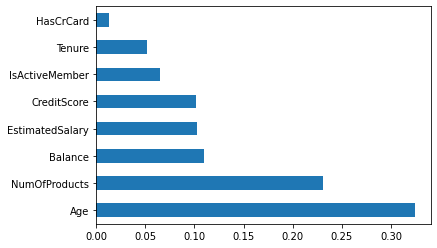

In [37]:
feature_importances = pd.Series(model_forest.feature_importances_, index=features.columns)
feature_importances.nlargest(25).plot(kind='barh')
plt.show

**Наиболее слабыми признаками являются "наличие кредитной карты", "активность клиента" и "сколько лет человек является клиентом банка"**

**Построим ROC-кривую по результатам предсказания модели**

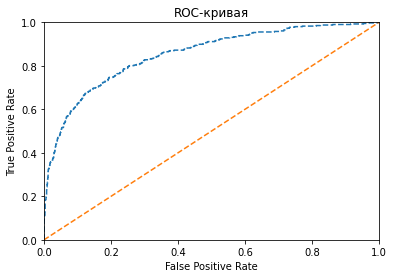

In [38]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=21, max_depth=7)
model_forest.fit(features_upsampled, target_upsampled)

probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()

plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

**Выведем средние значения тестовой и обучающей выборки по целевому признаку "Exited"**

In [39]:
print(
'Среднее значение целевого признака:', target.mean(), '\n',
'Среднее значение предсказаний тестовой модели:', probabilities_one_test.mean())

Среднее значение целевого признака: 0.2037 
 Среднее значение предсказаний тестовой модели: 0.41210345040602486


# Вывод

**В данном проекте мы рассмотрели работу нескольких обучающих моделей - наилучший показатель у модели "Случайный лес" - F1 тестовой модели: 0.593, AUC-ROC тестовой модели: 0.843.**

**Если сравнивать в количественном выражении работу модели, то она далека от идеала, поскольку среднее значение целевого признака исходной выборки составляет 0.2037, а среднее значение предсказаний тестовой модели составляет 0.412.**

**Но это также может говорить о том, что риск ухода клиента возрастает и менеджерам банка необходимо предпринимать действия для удержания клиентов.**

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*